# Formalia:

Please read the [assignment overview page](https://github.com/lalessan/comsocsci2022/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on March 1st at 23:55. Hand in your Jupyter notebook file (with extension `.ipynb`) via DTU Learn _(Course Content, Assignemnts, Assignment 1)_. 

Remember to include in the first cell of your notebook:
* the link to your group's Git repository
* group members' contributions

# Part 1: Datasets for Computational Social Science

_Ten characteristics of Big Data._ Consider the dataset you have collected in Week 1, and think of the *10 characteristics of Big Data* from the book [Bit by Bit section 2.3](https://www.bitbybitbook.com/en/1st-ed/observing-behavior/characteristics/).
> * **Big**. How large is this data (approximately)? Could you collect the same amount of information via surveys?

Almost 20000 rows of data were collected.It is almost impossible to obtain such a large and comprehensive amount of data through surveys, which requires a huge investment of manpower and resources.
> * **Always-on**. Can you keep collecting data over time?

The data covers every second of the 24 hours of the period. But people need to live. It is impossible to collect with such intensity
> * **Non-reactive**. Is the dataset non-reactive?

Communication on the Internet is anonymous and our collection is post-collection, where people are not aware at the time of posting that their actions will be watched or are not that concerned about leaving records on Internet.
> * **Incomplete**. Do you think the dataset captures entirely the unfolding of events leading to the GME stock rise in price? 

As far as I know, this event originated on the reddit website, so we can get a partial picture of the cause from these comments. In particular, how it started. *According to the existing empirical data, during the pandemic, most of the companies have invested more in social vs. traditional media for their marketing activities. [1]* It is evident that the epidemic played an important role outside of the internet as well.
And the GME incident was not limited to the reddit community, there are many other social networking sites besides reddit, like twitter etc.

[1]Mitreva M, Arsova M, Jovanov T, et al. Consumer media habits versus media investment trends during Covid-19[J]. 2021.
> * **Inaccessible**. Is the data accessible? 

The vast majority of the data is, except for deleted and blocked posts (if exist).
> * **Non-representative**. Do you think that the conclusions we will draw by analyzing this dataset are specific to the GME events? Or could they instead help us understand social phenomena more in general? If yes, which phenomena could you think of? Of not, what are the aspects that make this dataset non-representative?

I think this data set is representative. Indeed, much research has been done by many academics. For example, Zaghum has demonstrate a robust positive association between GameStop prices and the performance of high short interest indices in *Comovements between heavily shorted stocks during a market squeeze: Lessons from the GameStop trading frenzy*. A similar thing happened with the cryptocurrency Dogecoin.

The *perfect storm* was fuelled by social media, which created a huge and rapid impact through internet.
> * **Drifting**. Is there any source of *drift* in this dataset (within the period observed)? 

Yes.
* Population Drift - Such as, drift from original users to new users who signed up and participated in reddit discussions to follow it.
* Behavioral Drift - As the buzz grew, people stopped using GME-related hashtags and engaged directly in the discussion.
> * **Algorithmically confounded**. Is the dataset algorithmically confounded? If yes, why?

Absolutely yes. I am not a user of reddit, but I visited the homepage of the site. On the homepage there are sections such as Trending today, Popular posts and POPULAR COMMUNITIES, which means that there is a reddit recommendation algorithm behind it.
This causes the popular ones to become even more popular with the intervention of the algorithm.
> * **Dirty**. What aspect may make this dataset *dirty*?

1. Repeated posts.
2. Posts not related to GME.
3. Other debates sparked by GME, for example, attempted suicide
> * **Sensitive**. Is there any sensitive information in the data?


* Comments may contain sensitive personal information
* Speculation is not respected and public data may lead to emotional harm
* Some users can be exposed financially, how their wealth came to be or how it was lost
* Users can be targeted by their id or the content of these discussions and there is a risk of doxing

# Part 2: activity on Reddit and GME prices



Consider the following datasets: 
 * the *GME market data*, that you can download from [here](https://finance.yahoo.com/quote/GME/history/). 
 * the dataset you downloaded in Week1, Exercise 2. We will refer to this as the _comments dataset_.

> _Part 2.1 : Plotting prices and comments using line-graphs._
> 1. Plot the daily volume of the GME stock over time using the _GME market data_. On top of the daily data, plot the rolling average, using a 7 days window (you can use the function [``pd.rolling``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)). Use a [log-scale on the y-axis](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html).

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.dates as mdates

def setup_mpl():
    mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['lines.linewidth'] = 1
setup_mpl()

In [2]:
GME_data = pd.read_csv('../Assignment1/GME.csv', parse_dates = ['Date']).set_index('Date')

In [3]:
rolled_series = GME_data['Volume'].rolling('7D').mean()

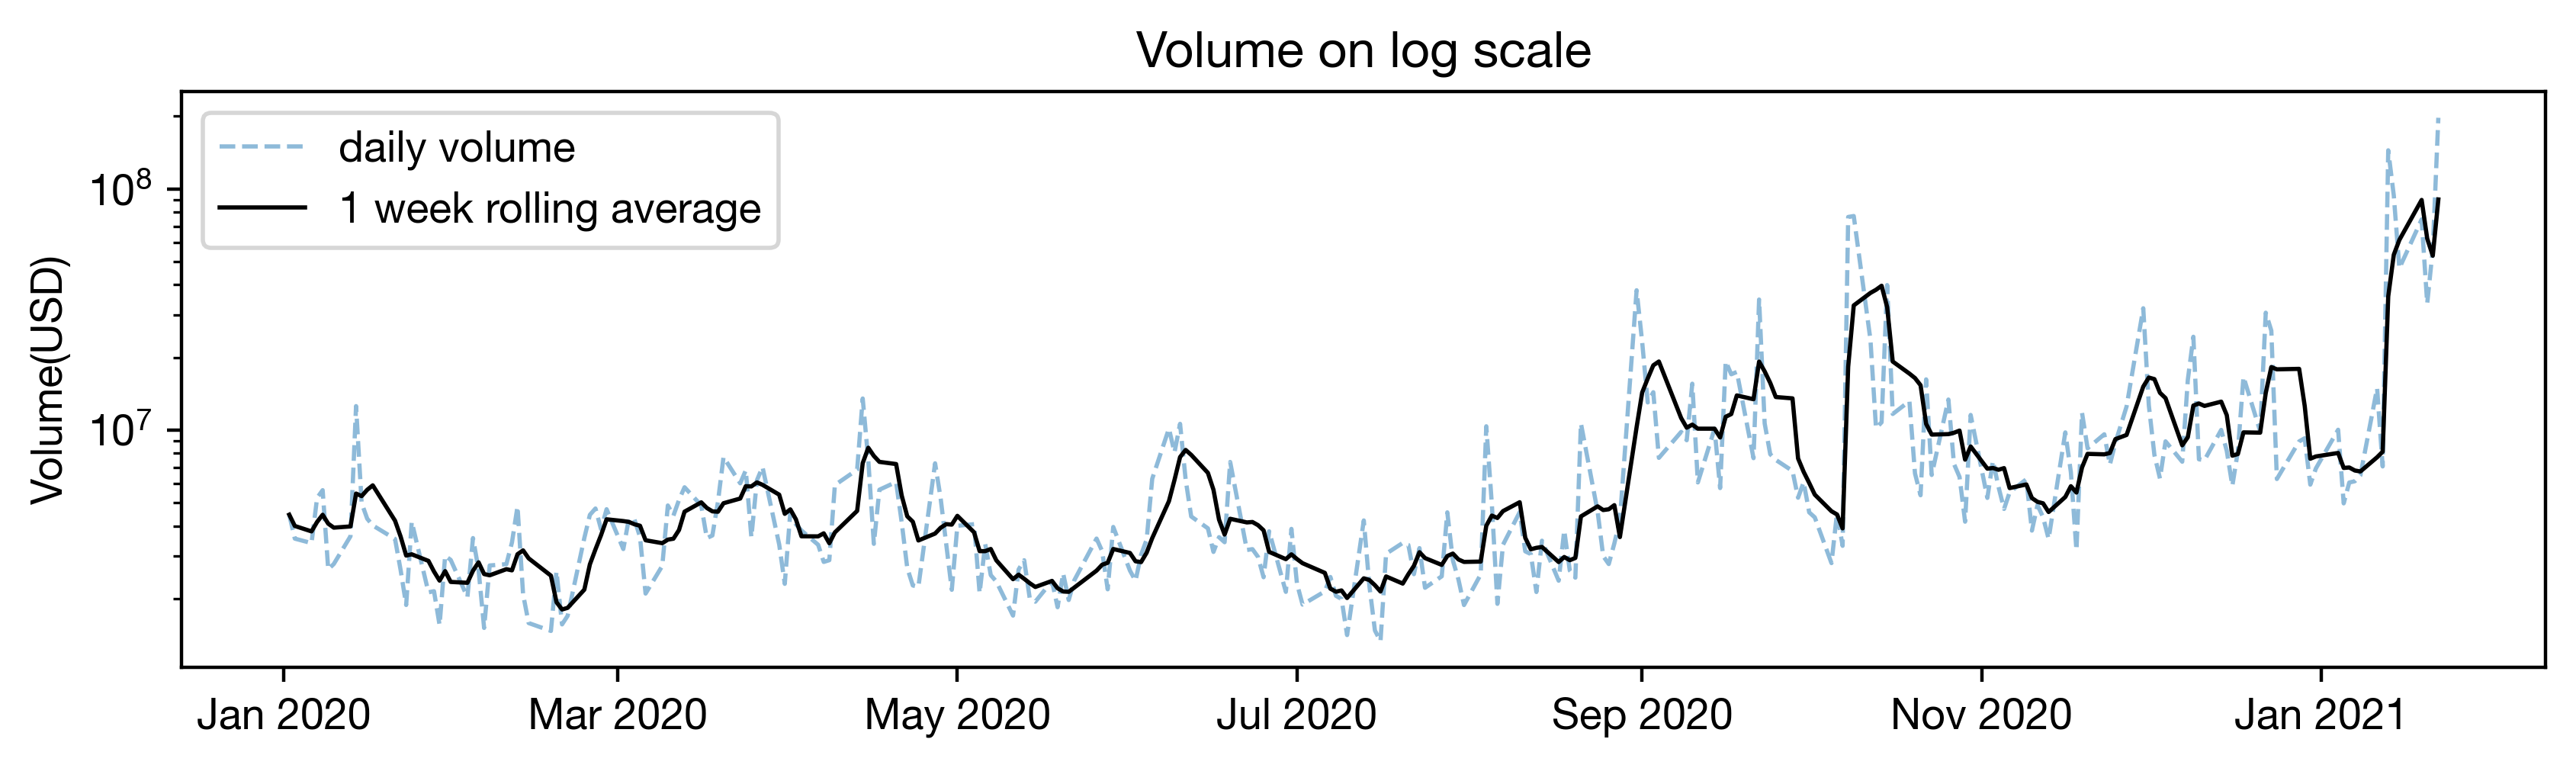

In [4]:
myFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots(figsize=(10,2.5),dpi=400)
ax.plot(GME_data.index,GME_data.Volume, ls = '--', alpha=0.5, label='daily volume')
ax.plot(rolled_series.index,rolled_series.values, color = 'k', label='1 week rolling average')
ax.set_ylabel('Volume(USD)')
ax.set_yscale('log')
ax.set_title("Volume on log scale")
ax.legend()
ax.xaxis.set_major_formatter(myFmt)
#plt.savefig('./GME_Volume.png')

> 2. Now make a second plot where you plot the total number of comments on Reddit per day. Follow the same steps you followed in step 1.

In [5]:
comments = pd.read_csv('../Assignment1/GME_comments.csv')

In [6]:
import datetime as dt
#Drop the column on timestamp format
comments['Date'] = comments['created_utc'].map(lambda t: dt.datetime.utcfromtimestamp(t))
#Set index by Date
comments.set_index('Date', inplace=True)
#Resample by day
daily_comments = comments['id'].resample('D').count()

In [7]:
rolled = daily_comments.rolling('7D').mean()

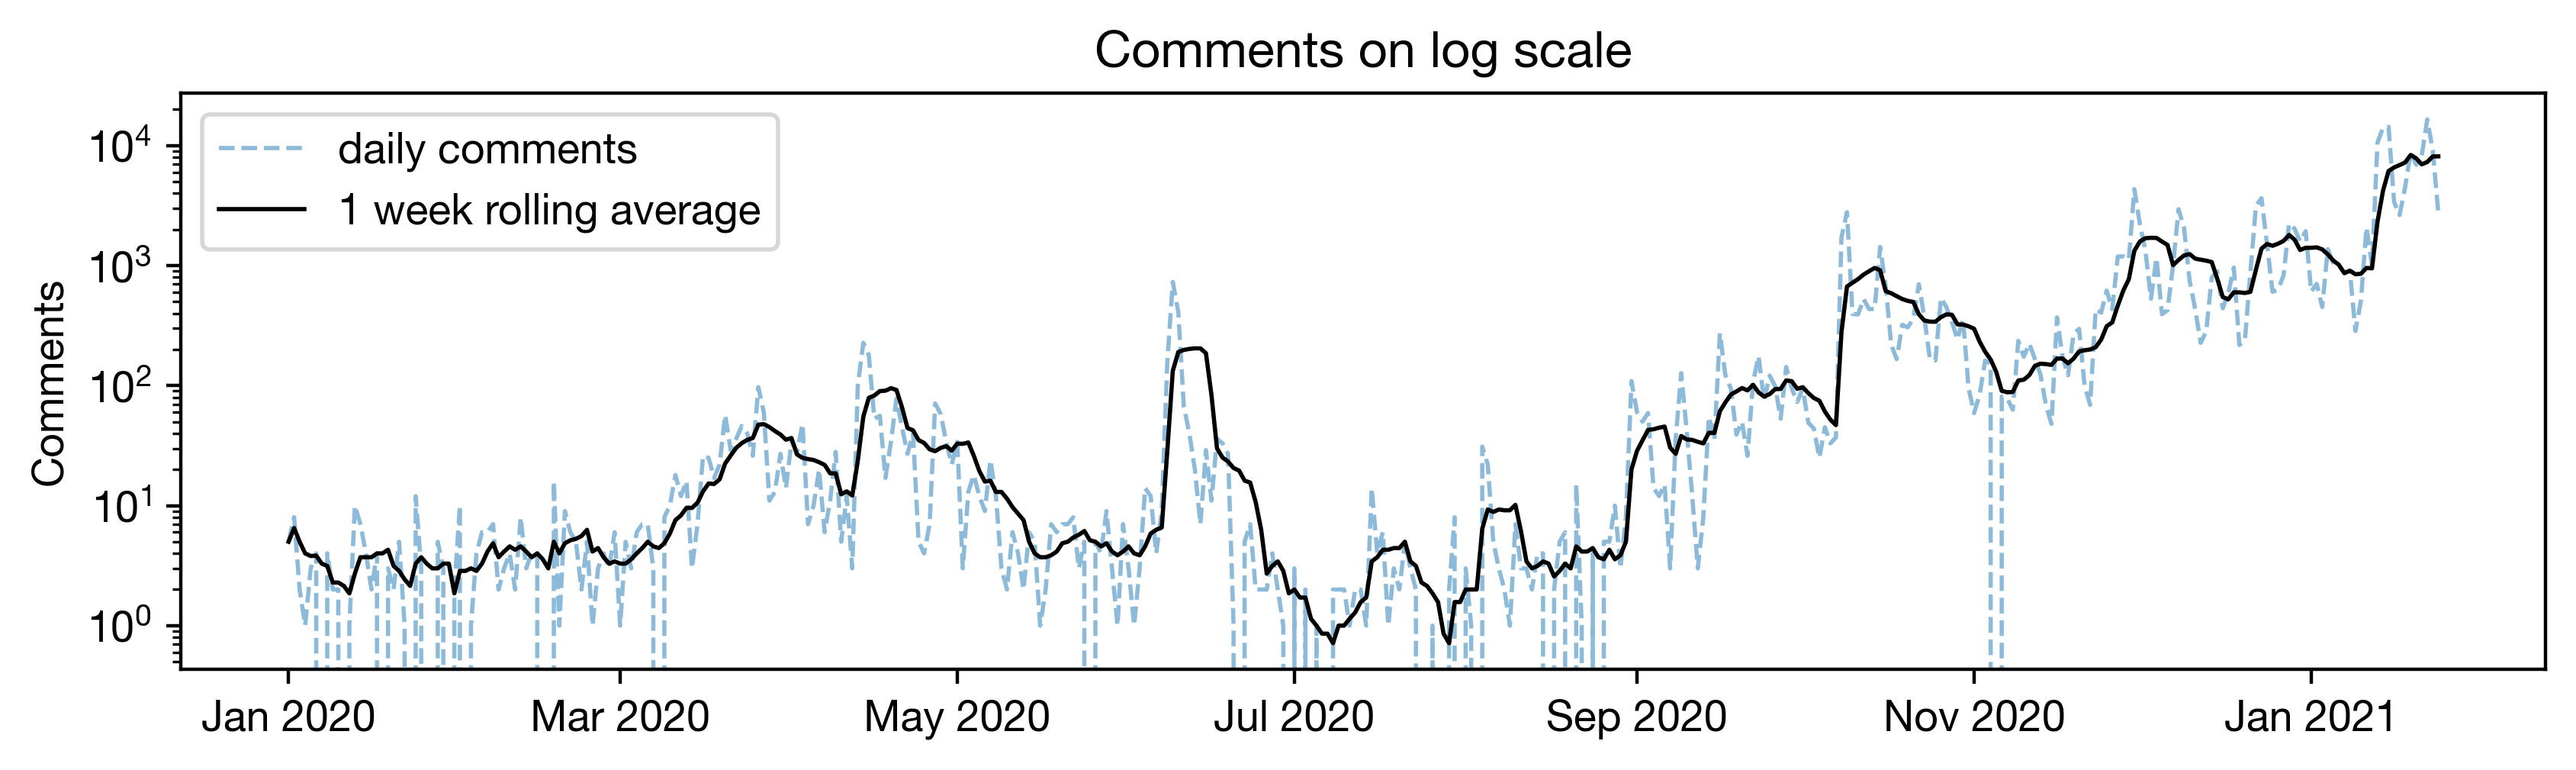

In [8]:
myFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots(figsize=(10,2.5),dpi=400)
ax.plot(daily_comments, ls = '--', alpha=0.5, label='daily comments')
ax.plot(rolled.index,rolled.values, color = 'k', label='1 week rolling average')
ax.set_ylabel('Comments')
ax.set_yscale('log')
ax.set_title('Comments on log scale')
ax.legend()
ax.xaxis.set_major_formatter(myFmt)
#plt.savefig('./GME_Comments.png')

> 3. What is the advantage of using the log-scale on the y-axis? What is the advantage of using a rolling-window?

There are some charateristics of log scale that we can take advatages of using it on y-axis. Firstly, Log scales are linear in multiplication. Multiplication on a log scale looks like addition on a linear scale such that a unit step on the scale corresponds to multiplication with a fixed value. In that reason, log scales are the natural choice for any data that have been obtained by multiplication or division. In particular, ratios should generally be shown on a log scale.

The other advantage is Log scales are frequently used when the data set contains numbers of very different magnitudes. We can see this case on the plot we showed. If you see plots on linear scale, since the data has wide scope, it is hard to see the changes in small range. By contrast, as you can see on log scaled plots, for the same data, you can see variations easily even on the narrow range.

We can visualize smoothed data by using a rolling-window. By smoothing the data, we have the advantage of keep the key trends in the data while removing irrelevant noise.

> 4. Now take a minute to __look at these two figures__. Then write in a couple of lines: What are the three most important observations you can draw by looking at the figures?

1. The trends of rolling average on both figures are similar each other.

2. The time when the number of comments rised steeply, the volume of GME stock also increased sharply.

3. It is easy to catch the long-term trend through rolling average plot than daily value plot. Because the act of smoothing removes minor details or noises form the original datas.


> _Part 2.2: Returns vs number of comments using scatter-plots_.
> In this part of the assignment, we will look at the association between GME market indicators and the volume of comments on Reddit. 
> 1. Compute the daily log-returns as ``np.log(Close_price(t)/Close_price(t-1))``, where ``Close_price(t)`` is the Close Price of GME on day t. You can use the function [pd.Series.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html). Working with log-returns instead of regular returns is a standard thing to do in economics, if you are interested in why, check out [this blog post](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).



In [9]:
GME_shift = GME_data['Close'].shift(periods=1)
log_returns = np.log(GME_data.Close/GME_shift)
log_returns.rename("log_returns", inplace=True)

Date
2020-01-02         NaN
2020-01-03   -0.070579
2020-01-06   -0.005115
2020-01-07   -0.058064
2020-01-08    0.035591
                ...   
2021-01-15   -0.117094
2021-01-19    0.103217
2021-01-20   -0.006116
2021-01-21    0.095264
2021-01-22    0.412644
Name: log_returns, Length: 267, dtype: float64

> 2. Compute the daily log-change in number of new comments as ``np.log(comments(t)/comments(t-1))`` where ``comments(t)`` is the number of comments on day t. 

In [10]:
#remove days without any comments
empty = []
for i in range(len(daily_comments)):
    if daily_comments[i]==0:
        empty.append(daily_comments.index[i])
nonzero_daily_comments = daily_comments.drop(labels = empty)
nonzero_daily_comments

Date
2020-01-01        5
2020-01-02        8
2020-01-03        2
2020-01-04        1
2020-01-05        3
              ...  
2021-01-20     6913
2021-01-21     8243
2021-01-22    16533
2021-01-23     9139
2021-01-24     2743
Name: id, Length: 361, dtype: int64

In [11]:
daily_comments_shift = nonzero_daily_comments.shift(periods=1)
log_change = np.log(nonzero_daily_comments/daily_comments_shift)
log_change.rename("log_change", inplace=True)

Date
2020-01-01         NaN
2020-01-02    0.470004
2020-01-03   -1.386294
2020-01-04   -0.693147
2020-01-05    1.098612
                ...   
2021-01-20   -0.244978
2021-01-21    0.175961
2021-01-22    0.695994
2021-01-23   -0.592807
2021-01-24   -1.203499
Name: log_change, Length: 361, dtype: float64

> 3. Compute the correlation coefficient (find the formula in the Data Visualization book, section 12.2) between the series computed in step 1 and step 2 (note that you need to first remove days without any comments from the time-series). Is the correlation statistically significant? 

In [12]:
#corr. on pandas
log_data = pd.concat([log_change, log_returns], axis=1)
log_data.corr()

,log_change,log_returns
log_change,1.000000,0.421724
log_returns,0.421724,1.000000


In [13]:
# pearson corr. from scipy
df = log_data.dropna()

from scipy import stats

stats.pearsonr(df.log_change, df.log_returns)

(0.42172385665016243, 3.3529074253887723e-12)

The correlation coefficient from our data is 0.42. As the result always has a value between -1 and 1, and has strong correlation as the value get close to -1 or 1, the value 0.42 doen't seem much significant. However, it is pretty high regarding the field of social science.

More mathmatically, we can see whether it is significant or not by p-value. p-value is a parameter from statistical significance test which is testing null hypothesis is whether true or not. If p-value roughly means probability of an uncorrelated datasets that have a correlation at least as extreme as the one from given datasets. So as p-value(3.3529074253887723e-12) is small enough, it means the correlation computed by these datasets is statistically significant.

> 4. Make a [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) of the daily log-return on investment for the GME stock against the daily log-change in number of comments. Color the markers for 2020 and 2021 in different colors, and make the marker size proportional to the Close price. 

In [14]:
GME_df = df.join(GME_data.Close)

Text(0, 0.5, 'log-returns on GME')

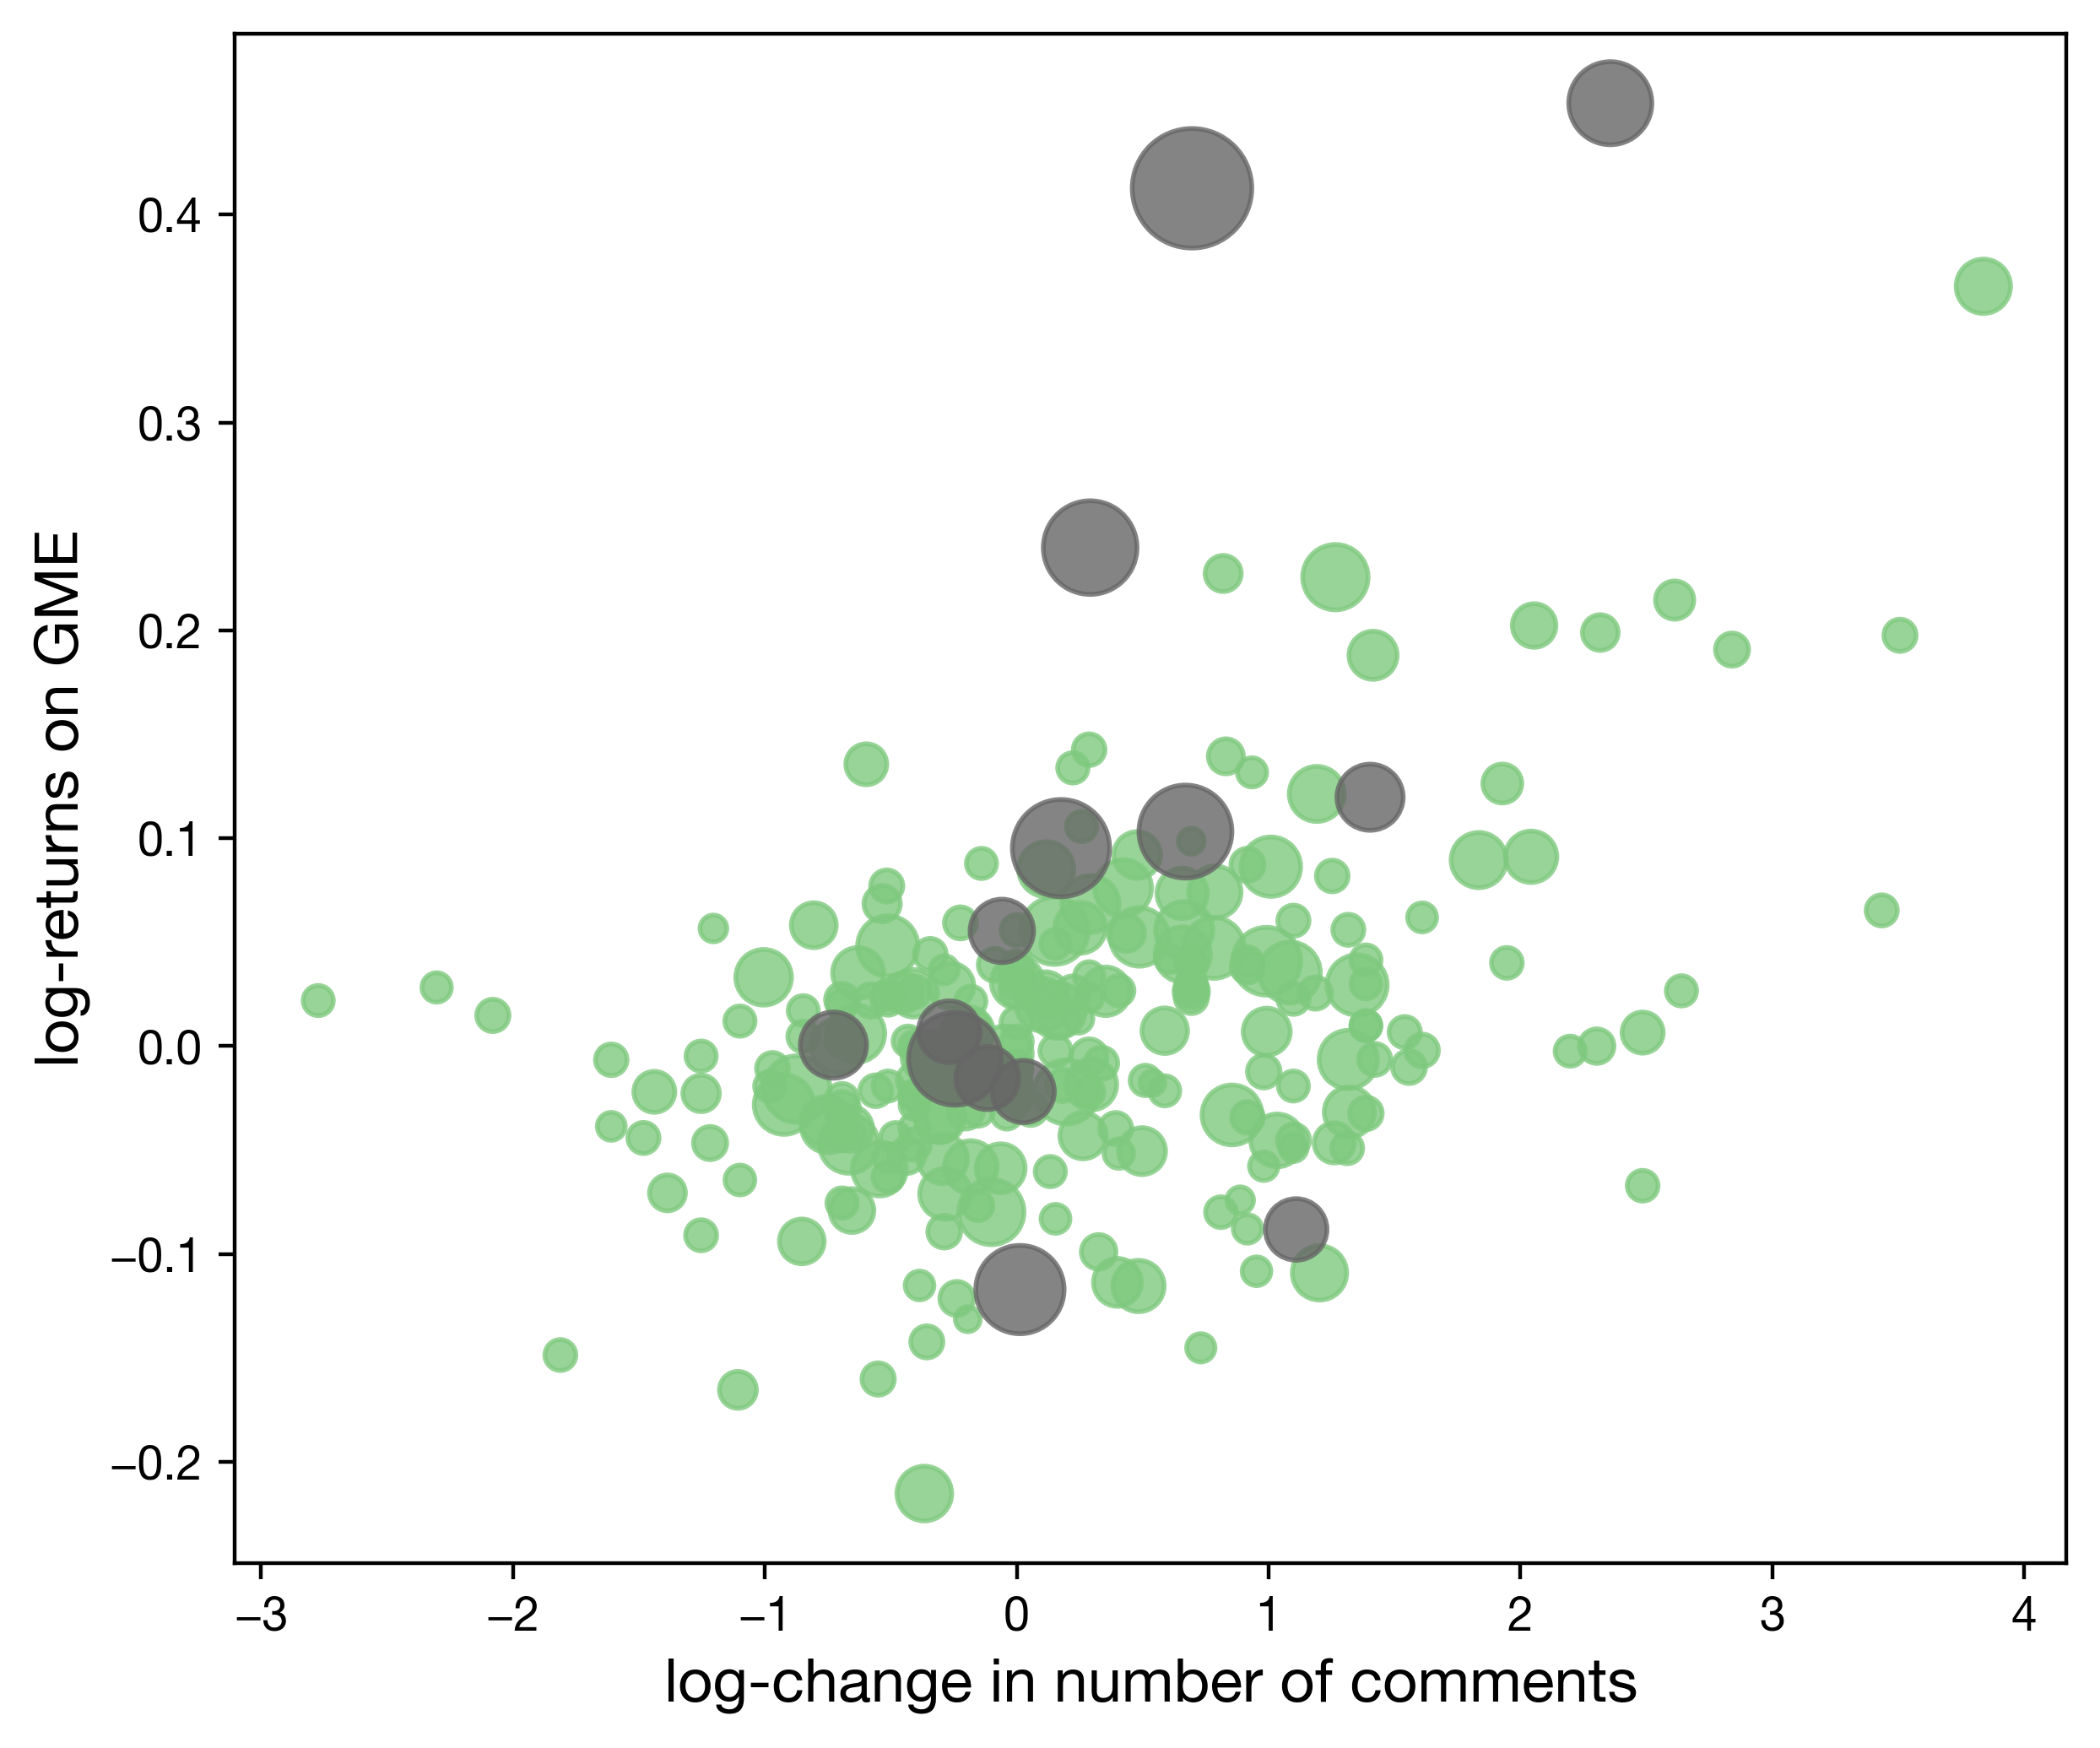

In [15]:
fig, ax = plt.subplots(figsize=(7,6),dpi=400)
ax.scatter(df.log_change, df.log_returns, c=df.index.year,cmap='Accent', s=GME_df.Close*10, alpha=0.8)
ax.set_xlabel('log-change in number of comments',fontsize=13)
ax.set_ylabel('log-returns on GME',fontsize=13)

> 5. Now take a minute to __look at the figure you just prepared__. Then write in a couple of lines: What are the three most salient observations you can draw by looking at it? 

1. As plots are scattered upper-right diagonal, they are correlated.
2. There was a large variability on GME stock price at 2021.
3. Because a lot of data is concentrated in the center, it is difficult to see signifiant observation.

> 6. Based on the exploratory data visualization in Exercises 2 and 3, what can you conclude on the research question: *Is the activity on wallstreetbet related to the price of the GME stock?*



Based on the project we have worked through, we can conclude that the activity on wallstreetbet is related to the price of the GME stock. As we saw on part2.1, long-term trand is similar each other. Furthermore, on part2.2, we calculated correlation coefficient value which was 0.42 and confirmed correlation mathmatically. Also, we visualized the datas on scatter plot and checked the correlation.

#  Part 3: Exercises using the `NetworkX` library

> Solve the following exercises from your [Network Science book](http://networksciencebook.com).
> * Go to Section 2.12: [Homework](http://networksciencebook.com/chapter/2#homework2), then
>     * Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
>     * Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4).
>     * Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

### Exercise 2.1 (the 'Königsberg Problem')

|Image| a. | b. | c. | d. |
|---|---|---|---|---|
|Can it be drawn in one stroke?|√|×|√|√|

Reason: The necessary condition for a one-stroke graph is that the number of singularities is **0 or 2**.

|Image| a. | b. | c. | d. |
|---|---|---|---|---|
|Number of nodes|4|5|12|6|
|Number of node(s) with odd number of links|2|4|0|2|
|Number of node(s) with even number of links|2|1|12|4|




### Exercise 2.3 (the 'Graph representation')


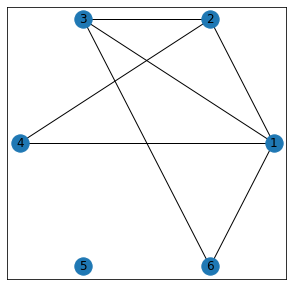

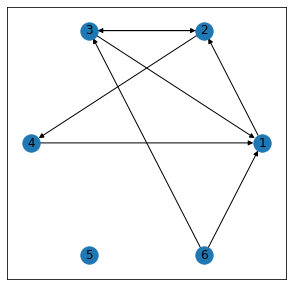

In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#更新全局参数，设置图形大小
plt.rcParams.update({
    'figure.figsize':(5,5)
})

# Generate directed graph topology
G = nx.DiGraph() 
G.add_nodes_from(['1','2','3','4','5','6'])
G.add_edges_from([('1','2'),('2','3'),('2','4'),('3','2'),('3','1'),('4','1'),('6','1'),('6','3')])
pos = nx.circular_layout(G)

# Convert to two graphs
G1 = G.to_undirected()
G2 = G

# Drawing
nx.draw_networkx(G1,pos)
plt.show()
nx.draw_networkx(G2,pos)
plt.show()

In [17]:
m1 = np.array(nx.adjacency_matrix(G1).todense())
m2 = np.array(nx.adjacency_matrix(G2).todense())


print('The corresponding adjacency matrice are:')
print('M1:',m1)
print('M2:',m2)

The corresponding adjacency matrice are:
M1: [[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]
M2: [[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


In [18]:
c1 = np.array(nx.average_clustering(G1))
c2 = np.array(nx.average_clustering(G2))


print('The average clustering coefficient of the first network is:','%.2f'% c1)
print('The average clustering coefficient of the second network is:','%.2f'% c2)


The average clustering coefficient of the first network is: 0.64
The average clustering coefficient of the second network is: 0.32


In [19]:
nx.write_edgelist(G1,'edgelist_G1.txt')
nx.write_edgelist(G2,'edgelist_G2.txt')
print('The file has been successfully exported, please check in the folder AS1.')

The file has been successfully exported, please check in the folder AS1.


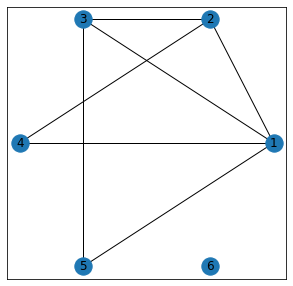

The corresponding adjacency matrice is:
M1 New: [[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]
The average clustering coefficient of the first network is: 0.64
The file has been successfully exported, please check in the folder AS1.


In [20]:
G1N = nx.DiGraph() 
G1N.add_nodes_from(['1','2','3','4','5','6'])
G1N.add_edges_from([('1','2'),('2','3'),('2','4'),('3','2'),('3','1'),('4','1'),('5','1'),('5','3')])
pos = nx.circular_layout(G)

# Convert
G1N = G1N.to_undirected()


# Drawing
nx.draw_networkx(G1N,pos)
plt.show()
# adjacency matrice
m1N = np.array(nx.adjacency_matrix(G1N).todense())
print('The corresponding adjacency matrice is:')
print('M1 New:',m1N)

c1N = np.array(nx.average_clustering(G1N))
print('The average clustering coefficient of the first network is:','%.2f'% c1N)

nx.write_edgelist(G1N,'edgelist_G1N.txt')
print('The file has been successfully exported, please check in the folder AS1.')


2.3.4.1. The fifth and sixth rows are swapped, and the fifth and sixth columns are swapped.

2.3.4.2. Only labels 5 and 6 were replaced with each other.

2.3.5 We do not know the existence of isolated node 5 from the link list


In [21]:
print('All paths from 1 to 3 in the first network are:')
for path1 in nx.all_simple_paths(G1, source='1', target='3'):
     print(path1)
    
print('All paths from 1 to 3 in the seccond network are:')
for path2 in nx.all_simple_paths(G2, source='1', target='3'):
     print(path2)

All paths from 1 to 3 in the first network are:
['1', '2', '3']
['1', '3']
['1', '4', '2', '3']
['1', '6', '3']
All paths from 1 to 3 in the seccond network are:
['1', '2', '3']


2.3.6 1 path exists in network a, non-exist in network b

### Exercise 2.5 ('Bipartite Networks') 

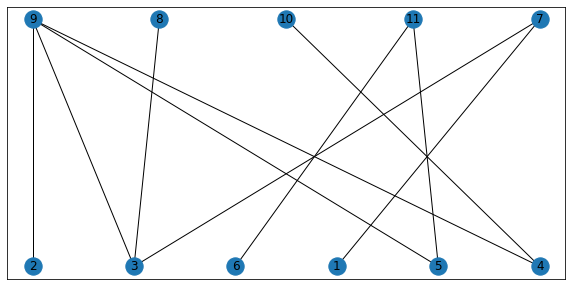

In [22]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#更新全局参数，设置图形大小
plt.rcParams.update({
    'figure.figsize':(10,5)
})

from networkx.algorithms import bipartite

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(['1','2','3','4','5','6'], bipartite=0)
B.add_nodes_from(['7','8','9','10','11'], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([('1','7'),('2','9'),('3','7'),('3','8'),('3','9'),('4','9'),('4','10'),('5','9'),('5','11'),('6','11')])

top = nx.bipartite.sets(B)[1]
pos = nx.bipartite_layout(B,top, align='horizontal')

nx.draw_networkx(B,pos)
plt.show()

2.5.1
$$L_{max}=N_1*N_2=6*5=30$$
2.5.2
$$ \sum_{i=1}^{N}-L_{max}=66-30=36$$
2.5.3
$$ \frac{\sum_{i=1}^{N}}{L_{max}}=\frac{\frac{(N_1+N_2)(N_1+N_2+1)}{2}}{N_1*N_2}=1+\frac{N_1^2+N_2^2}{2N_1N_2}$$
∵$N_1<<N_2$
∴$$ \frac{\sum_{i=1}^{N}}{L_{max}}>1+\frac{N_2^2}{2N_2}$$
$$ \frac{\sum_{i=1}^{N}}{L_{max}}>1+\frac{N_2}{2}$$
2.5.4

∵The graph is bipartite

∴Each edge connects a vertex in the top $S_1$ to a vertex in the bottom $S_2$

∴The degree sums $sum_1$ and $sum_2$are equals to $L$

∵$\overline{k_1}=sum_1/N_1$and$\overline{k_2}=sum_2/N_2$

∴$$N_1\overline{k_1}=N_2\overline{k_2}$$

# Part 4: Properties of the real-world network of Redditors

For this part of the assignment, consider the directed network of redditors posting about GME on r/wallstreetbets in the period included between Jan 1st and Dec 31st, 2020 (the one you built in Week 3, Part 3).

> _Part 4.1 Random Network_: Create a Random Network as a null model to investigate some properties of the Redditors Network.
> * Compute the value of _p_ such that the number of expected edges of the random network equals the number of edges in the redditor network (see equation 3.2 in your Network Science Book). What is the value of p? Compute the average value of the degree < k > (using the formula).
> * Create a Random network with the same number of nodes as the redditor networks, and _p_ as computed above. Generate a random network by linking nodes in every possible pair with probability _p_.
> * Visualize the Redditors Network and the Random Network. Comment on the differences between the two.
>
> _Part 4.2 Clustering_: Compare the clustering coefficient in the Redditors Network and its random counterpart.
> * Compute the clustering coefficient for all nodes in the random network, using the formula 2.15 in your book.  
> * Compute the average clustering across nodes of the random network. Is it consistent with the analytical prediction (network science book equation 3.21)?
> * Compute the average clustering coefficient for the Redditors network. How does it compare to its random counterpart? Is it something you would expect? Why?

In [ ]:
#formula 3.2
#p=(2*L)/(N*(N-1))

In [ ]:
#Degree
#k=(2*L)/N
#k=p*(N-1)

In [23]:
#Use k and L to to generate a random network
random_network = nx.barabasi_albert_graph(k,L)
subax1 = plt.subplot(121)
nx.draw(random_network, with_labels=True, font_weight='bold')


NameError: name 'k' is not defined

In [ ]:
#Clustering Node (2.15)
#C=(2*L)/(k*(k-1))
#Average Clustering Node (3.21)
#C'=k/N